<a href="https://colab.research.google.com/github/Sriyoshija/task8/blob/main/Task8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

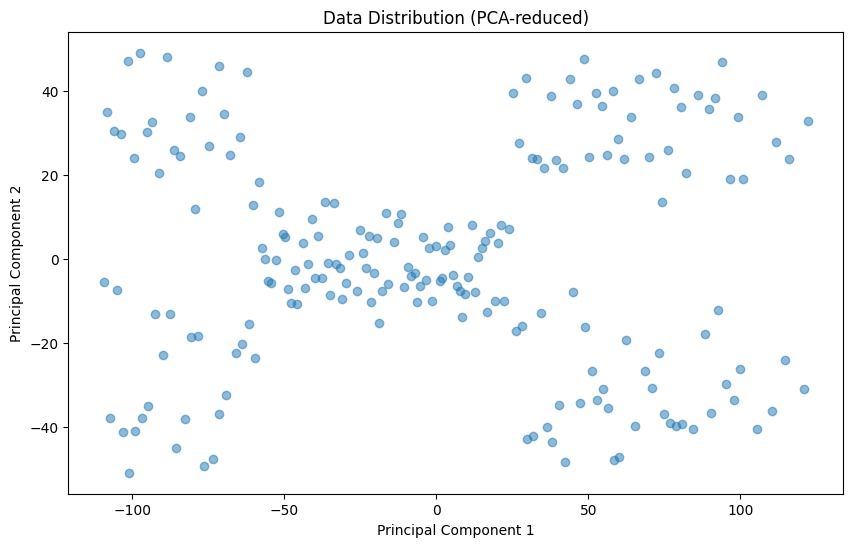

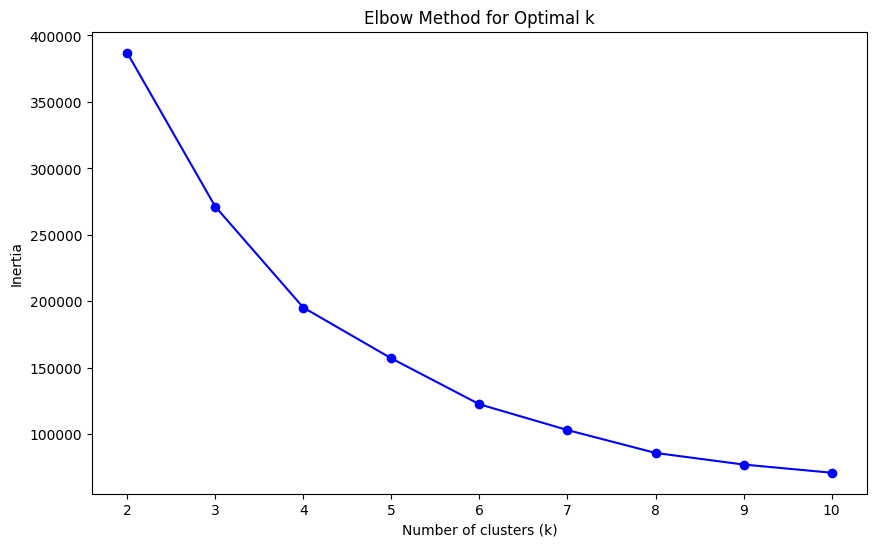

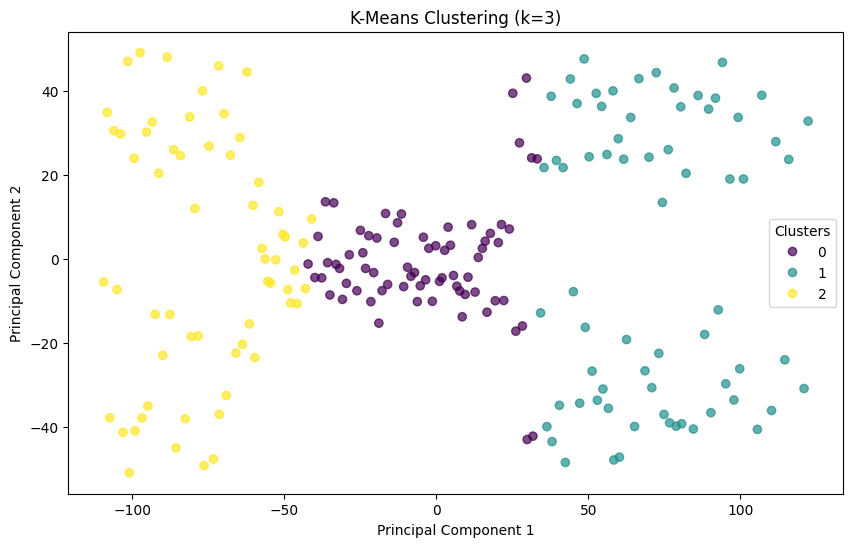

Silhouette Score for k=3: 0.38

First 5 rows of data with cluster labels:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        2  
1        2  
2        2  
3        2  
4        2  


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

file_path = "/content/Mall_Customers.csv"
df = pd.read_csv(file_path)

#Data preprocessing
numerical_df = df.select_dtypes(include=['float64', 'int64']).dropna()

#Dimensionality reduction for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(numerical_df)
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.5)
plt.title('Data Distribution (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#Determine optimal k using Elbow Method
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(numerical_df)
    inertia.append(kmeans.inertia_)

    if k > 1: #Silhouette score requires at least 2 clusters
        silhouette_scores.append(silhouette_score(numerical_df, kmeans.labels_))
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'bo-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.show()

#Find optimal k
optimal_k =3

#Final K-Means clustering
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = final_kmeans.fit_predict(numerical_df)

df_visual = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
df_visual['Cluster'] = cluster_labels

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_visual['PC1'], df_visual['PC2'], c=df_visual['Cluster'],
                      cmap='viridis', alpha=0.7)
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()

if optimal_k > 1:
    silhouette_avg = silhouette_score(numerical_df, cluster_labels)
    print(f"Silhouette Score for k={optimal_k}: {silhouette_avg:.2f}")
else:
    print("Silhouette Score requires at least 2 clusters")
df_labeled = df.copy()
df_labeled['Cluster'] = cluster_labels
print("\nFirst 5 rows of data with cluster labels:")
print(df_labeled.head())